## Assessment 2 - Bryson Walter

In [2]:
# Import all the libraries needed
import pandas as pd
import numpy as np
import seaborn as sns   
import matplotlib.pyplot as plt

## Load Dataset

In [3]:
# Get `pandas` to show all columns
pd.set_option('display.max_columns', None)

# Read the "Financial Transactions.csv" file into a Pandas DataFrame
churn = pd.read_csv("Customer-Churn-Records.csv")

# View the first 5 rows of the dataframe
churn.head()

# View the last 5 rows 
# churn.tail()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15634602,Hargrave,619,NSW,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15647311,Hill,608,QLD,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15619304,Onio,502,NSW,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15701354,Boni,699,NSW,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15737888,Mitchell,850,QLD,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


## Remove Redundant Columns

In [4]:
churn = churn.drop(['RowNumber','CustomerId','Surname'], axis=1)
churn.head()

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,619,NSW,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,608,QLD,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,502,NSW,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,699,NSW,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,850,QLD,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [5]:
churn = pd.get_dummies(churn,columns=['Geography','Gender','Card Type']) #drop_first=True = drops the first category to avoid multicollinearity
churn.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_NSW,Geography_QLD,Geography_VIC,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,619,42,2,0.00,1,1,1,101348.88,1,1,2,464,1,0,0,1,0,1,0,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,3,456,0,1,0,1,0,1,0,0,0
2,502,42,8,159660.80,3,1,0,113931.57,1,1,3,377,1,0,0,1,0,1,0,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,0,5,350,1,0,0,1,0,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,0,5,425,0,1,0,1,0,0,1,0,0


## EDA

In [6]:
churn.info()
print("\n --------------------------------------- \n")
churn.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_NSW       10000 non-null  uint8  
 13  Geography_QLD       10000 non-null  uint8  
 14  Geography_VIC       10000 non-null  uint8  
 15  Gender_Female       10000 non-null  uint8  
 16  Gende

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Geography_NSW,Geography_QLD,Geography_VIC,Gender_Female,Gender_Male,Card Type_DIAMOND,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100,0.501400,0.247700,0.250900,0.454300,0.545700,0.250700,0.25020,0.249500,0.249600
std,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839,0.500023,0.431698,0.433553,0.497932,0.497932,0.433438,0.43315,0.432745,0.432803
min,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.00000,0.000000,0.000000
75%,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.00000,0.000000,0.000000
max,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**Create a split of categorical and numerical columns**

In [7]:
# list the numerical columns
numerical_columns = churn.select_dtypes(include=["int64", "float64"]).columns.tolist()
print("Numerical Columns:")
display(pd.DataFrame({'column':numerical_columns}))

Numerical Columns:


,column
0,CreditScore
1,Age
2,Tenure
3,Balance
4,NumOfProducts
5,HasCrCard
6,IsActiveMember
7,EstimatedSalary
8,Exited
9,Complain


In [8]:
numerical_columns

['CreditScore',
 'Age',
 'Tenure',
 'Balance',
 'NumOfProducts',
 'HasCrCard',
 'IsActiveMember',
 'EstimatedSalary',
 'Exited',
 'Complain',
 'Satisfaction Score',
 'Point Earned']

In [9]:
# list the categorical columns
categorical_columns = churn.select_dtypes(include=["object"]).columns.tolist()
print("\nCategorical Columns:")
display(pd.DataFrame({'column':categorical_columns}))


Categorical Columns:


,column


In [10]:
categorical_columns

[]

In [11]:
churn.columns

Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Point Earned', 'Geography_NSW', 'Geography_QLD',
       'Geography_VIC', 'Gender_Female', 'Gender_Male', 'Card Type_DIAMOND',
       'Card Type_GOLD', 'Card Type_PLATINUM', 'Card Type_SILVER'],
      dtype='object')

------------------------

# Basic Checks
Investigate the data

In [12]:
# Data shape
print("\nDataFrame Dimensions (rows and columns)\n")
print(f"Row count: {churn.shape[0]}")
print(f"Attribute count: {churn.shape[1]}")
print("\n------------------\n")

# Data info
print("Checking data info:\n\n",
churn.info(),
"\n\n------------------\n")

# Checking for null values in the columns (TRUE or FALSE)
print("Checking for null values:\n\n",
churn.isnull(),
"\n\n------------------\n")

# Checking for the sum of null values in the columns
print("Checking for the sum of null values in the columns:\n\n",
churn.isnull().sum(),
"\n\n------------------\n")

# Checking for the percentage (%) of null values in the columns (helps determine which to drop or adjust)
print("Checking for the percentage (%) of null values in the columns :\n\n",
churn.isnull().mean(),
"\n\n------------------\n")

# Checking the columns for duplicated values
print("Checking the columns for duplicated values:\n\n",
churn.duplicated().sum(),
"\n\n------------------\n")


DataFrame Dimensions (rows and columns)

Row count: 10000
Attribute count: 21

------------------

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   CreditScore         10000 non-null  int64  
 1   Age                 10000 non-null  int64  
 2   Tenure              10000 non-null  int64  
 3   Balance             10000 non-null  float64
 4   NumOfProducts       10000 non-null  int64  
 5   HasCrCard           10000 non-null  int64  
 6   IsActiveMember      10000 non-null  int64  
 7   EstimatedSalary     10000 non-null  float64
 8   Exited              10000 non-null  int64  
 9   Complain            10000 non-null  int64  
 10  Satisfaction Score  10000 non-null  int64  
 11  Point Earned        10000 non-null  int64  
 12  Geography_NSW       10000 non-null  uint8  
 13  Geography_QLD       10000 non-null  uint8  
 14  Geo

## EDA Visualisations

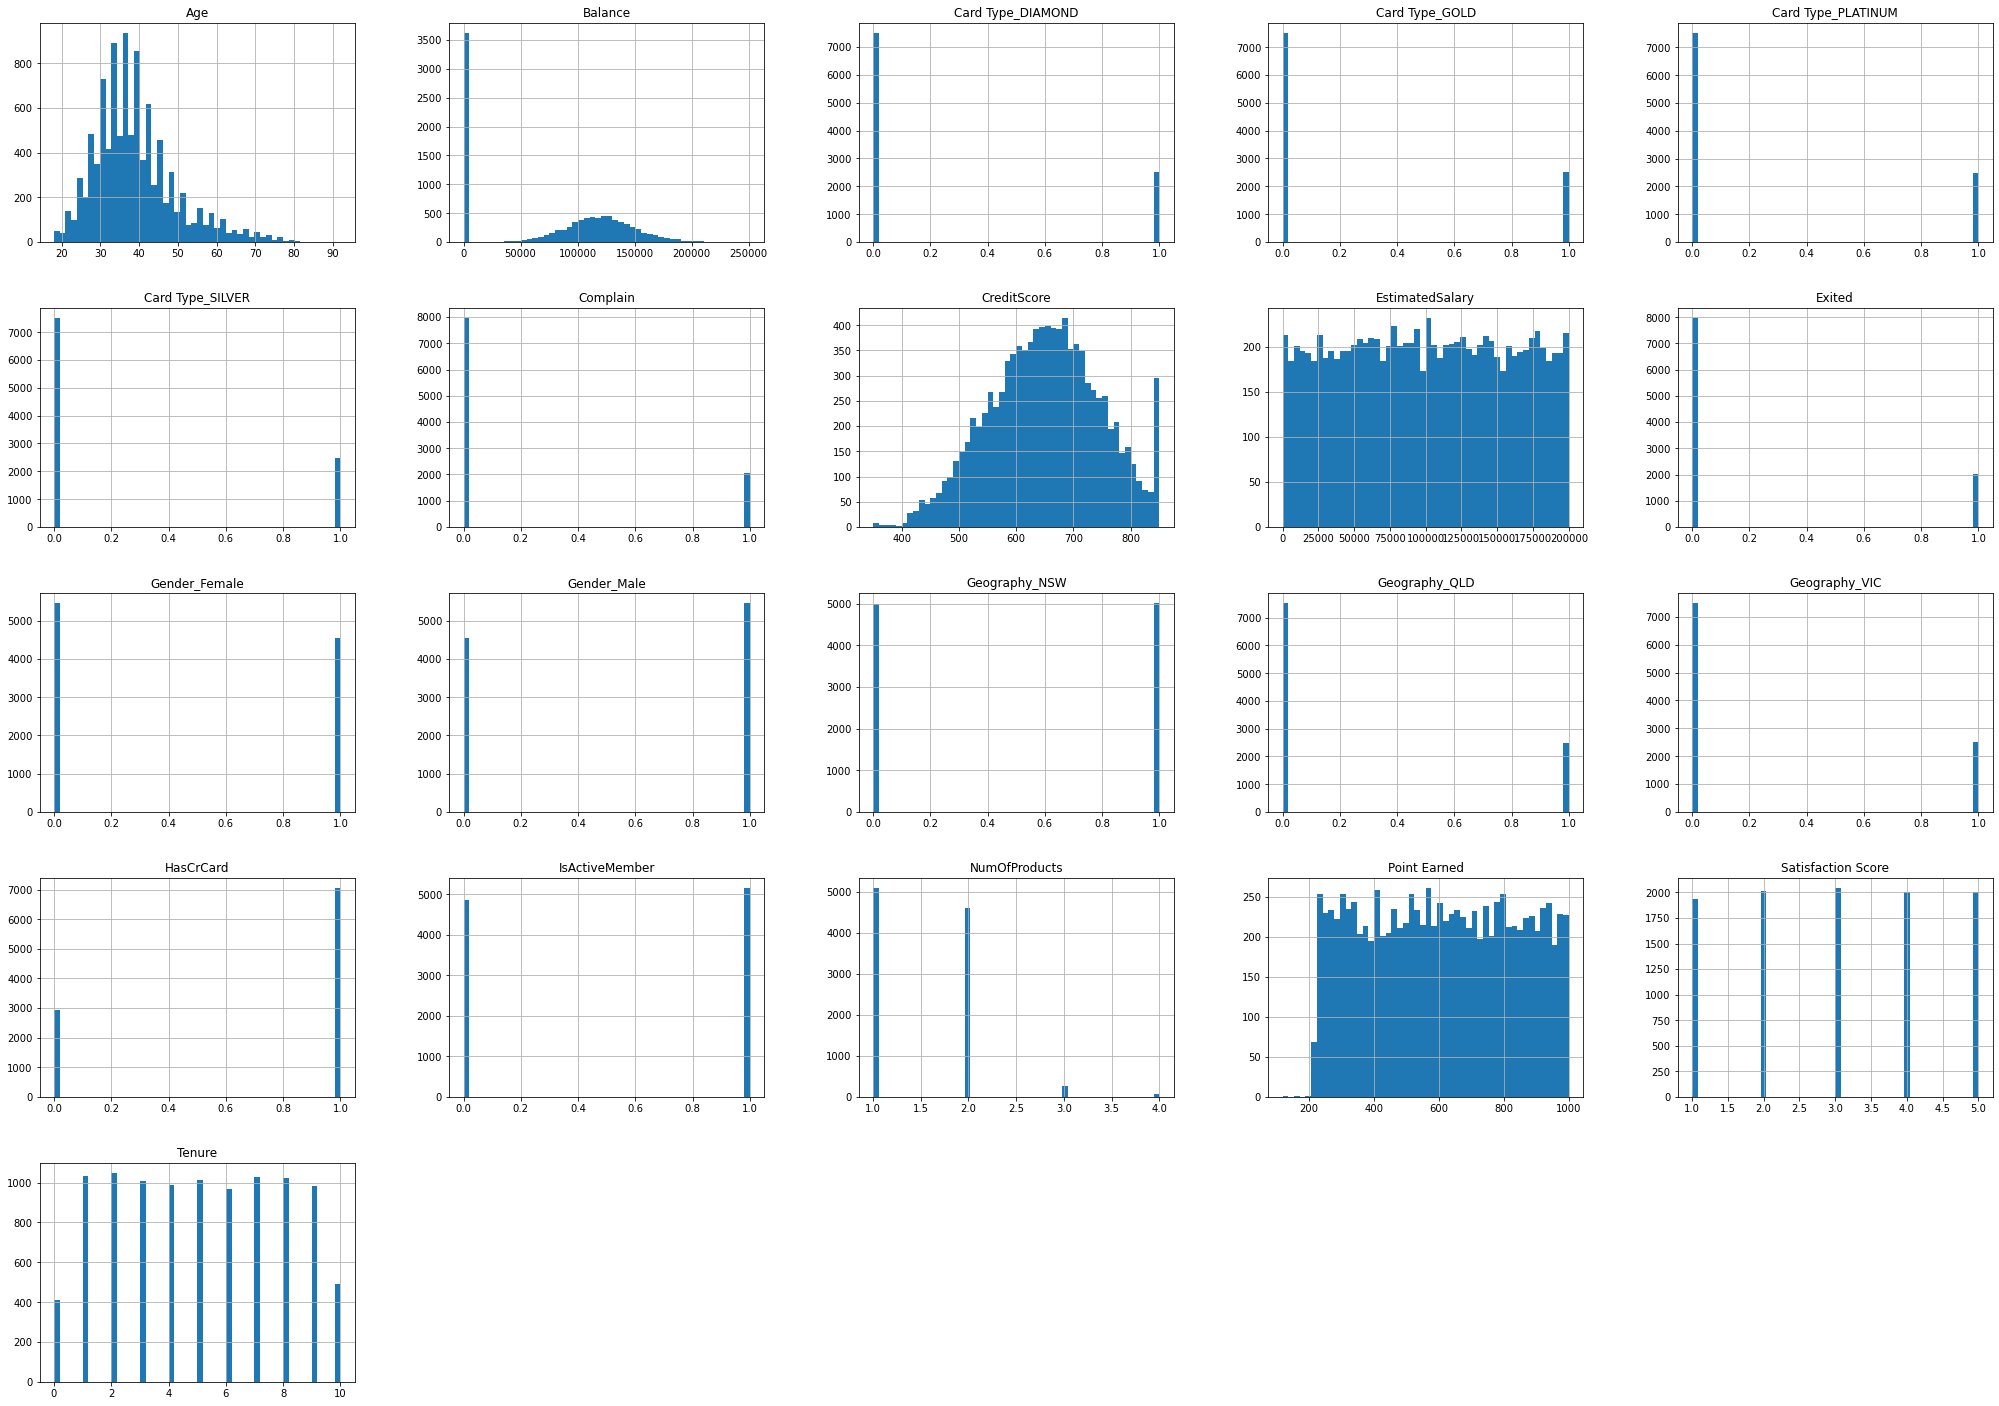

In [13]:
# Visualise each column in a histogram
churn.hist(bins=50, figsize=(35,25))
plt.show()

----------------------------------------

# Creating the models

In [14]:
# Import necessary libraries - models
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectFromModel
from sklearn.metrics import accuracy_score
from sklearn.inspection import permutation_importance
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score,precision_score,confusion_matrix,classification_report, precision_recall_curve

Given the exploratory data analysis (EDA) of the bank loan dataset shown above, which column would you choose as the target variable for a classification machine learning problem? Explain your reasoning.

One possible choice for the target variable is the Personal.Loan column, which indicates whether the customer accepted a personal loan offer from the bank or not. This column has a binary value of 0 or 1, which makes it suitable for a classification problem. The goal of the classification model would be to predict whether a new customer is likely to accept a personal loan offer or not, based on the features of the dataset.                                         

**Preparing train and test data**

**Examining dependent (output) feature**

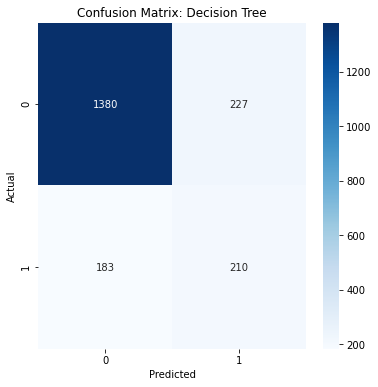

Model: Decision Tree
Accuracy: 0.795
Precision: 0.4805491990846682
Recall: 0.5343511450381679
F1 score: 0.5060240963855422


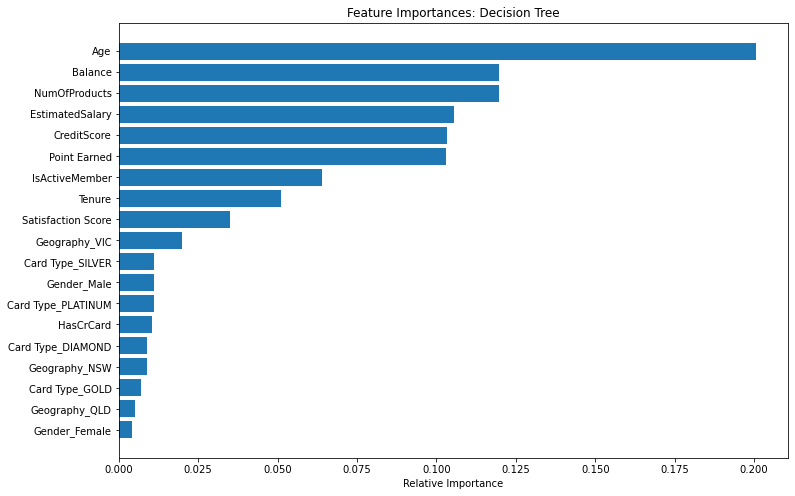

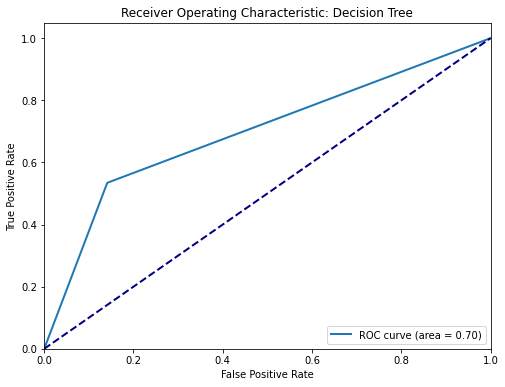

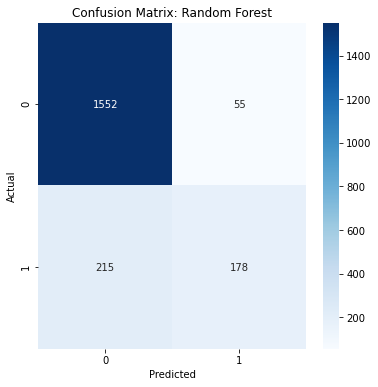

Model: Random Forest
Accuracy: 0.865
Precision: 0.7639484978540773
Recall: 0.4529262086513995
F1 score: 0.5686900958466453


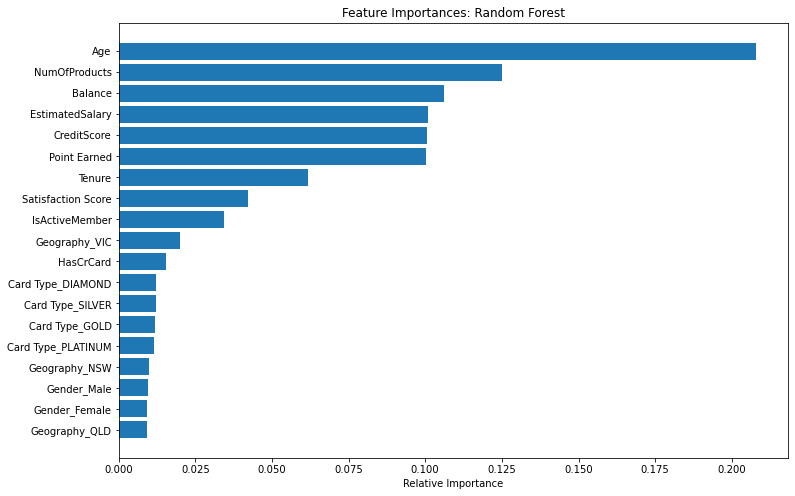

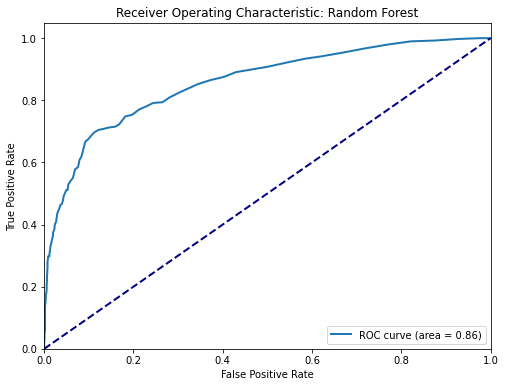

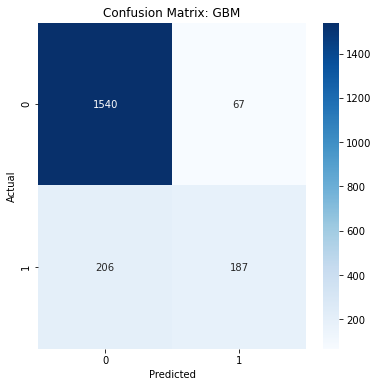

Model: GBM
Accuracy: 0.8635
Precision: 0.7362204724409449
Recall: 0.4758269720101781
F1 score: 0.5780525502318392


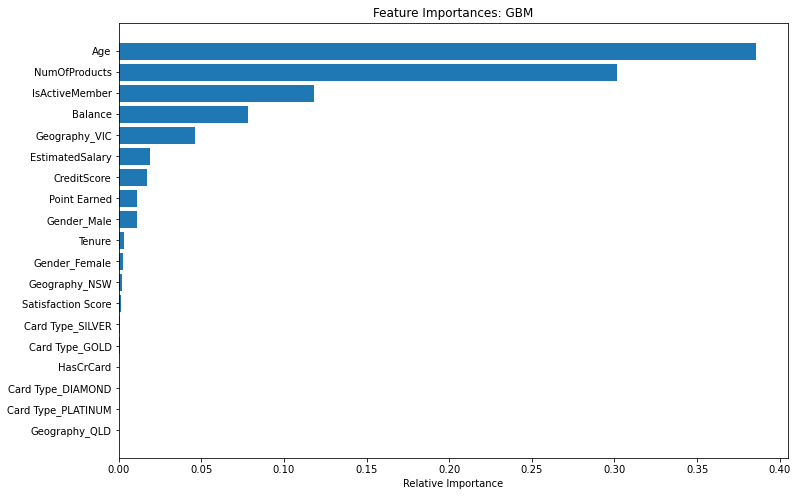

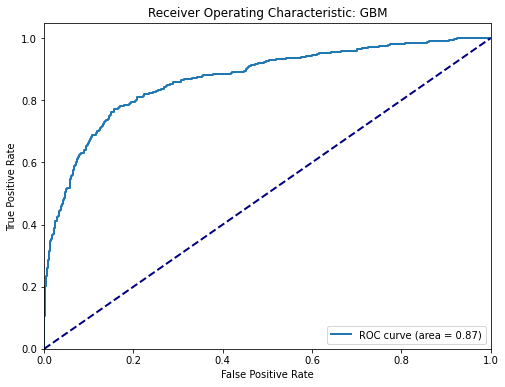

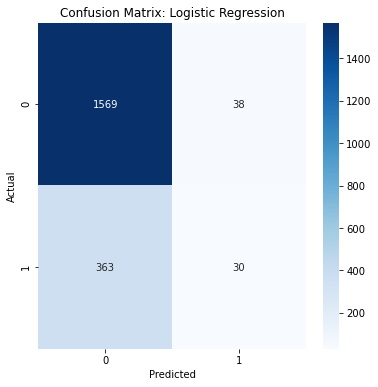

Model: Logistic Regression
Accuracy: 0.7995
Precision: 0.4411764705882353
Recall: 0.07633587786259542
F1 score: 0.1301518438177874


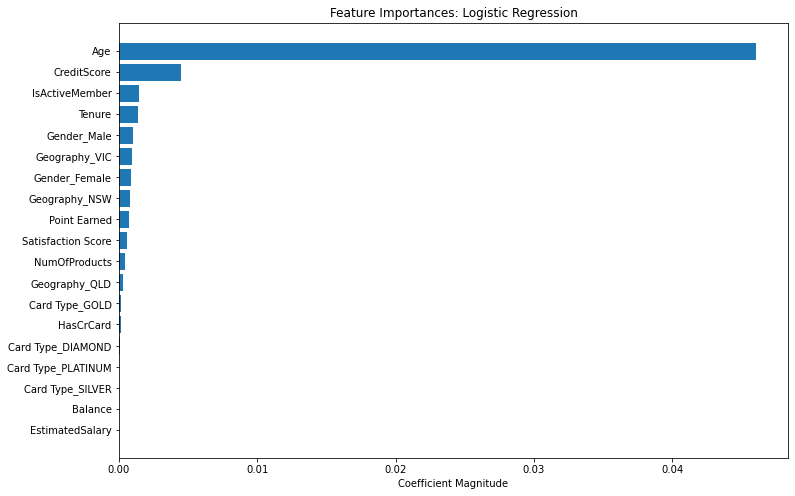

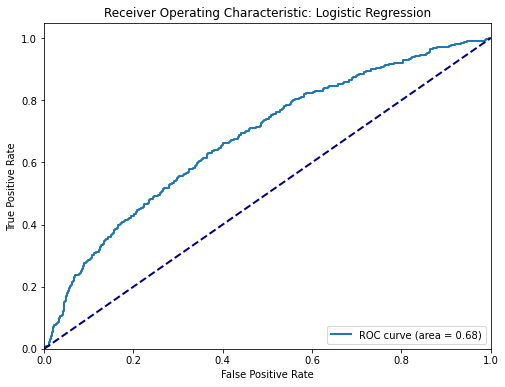

                     Precision    Recall        F1       AUC
Classifier                                                  
Decision Tree         0.480549  0.534351  0.506024  0.696547
Random Forest         0.763948  0.452926  0.568690  0.857659
GBM                   0.736220  0.475827  0.578053  0.868989
Logistic Regression   0.441176  0.076336  0.130152  0.678167


In [19]:
# Define features and target variable
churn_feature = churn.drop(['Exited','Complain'], axis=1)
churn_label = churn['Exited']

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(churn_feature, churn_label, test_size=0.2, random_state=42)

# Define classifiers
classifiers = [
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GradientBoostingClassifier(),
    LogisticRegression(max_iter=1000)  # Ensure logistic regression converges
]

# Classifier names
classifier_names = ['Decision Tree', 'Random Forest', 'GBM', 'Logistic Regression']

# Initialize storage for metrics
results = []

# Fit, evaluate, and visualize classifier models with a for loop
for clf, name in zip(classifiers, classifier_names):
    # Train the model
    clf.fit(X_train, y_train)

    # Predict the response for the test dataset
    y_pred = clf.predict(X_test)
    y_prob = clf.predict_proba(X_test)[:,1]  # Get probability estimates for ROC/AUC

    # Create a confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Visualize the confusion matrix
    plt.figure(figsize=(6,6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f'Confusion Matrix: {name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

    # Print evaluation metrics
    print(f"Model: {name}")
    print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
    print("Precision:", metrics.precision_score(y_test, y_pred))
    print("Recall:", metrics.recall_score(y_test, y_pred))
    print("F1 score:", metrics.f1_score(y_test, y_pred))

    # Display feature importance if available
    if hasattr(clf, 'feature_importances_'):
        importances = clf.feature_importances_
        indices = np.argsort(importances)

        plt.figure(figsize=(12,8))
        plt.title(f'Feature Importances: {name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [churn_feature.columns[i] for i in indices])
        plt.xlabel('Relative Importance')
        plt.show()
    elif hasattr(clf, 'coef_'):
        importances = np.abs(clf.coef_[0])
        indices = np.argsort(importances)

        plt.figure(figsize=(12,8))
        plt.title(f'Feature Importances: {name}')
        plt.barh(range(len(indices)), importances[indices], align='center')
        plt.yticks(range(len(indices)), [churn_feature.columns[i] for i in indices])
        plt.xlabel('Coefficient Magnitude')
        plt.show()

    # Calculate ROC/AUC
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'Receiver Operating Characteristic: {name}')
    plt.legend(loc="lower right")
    plt.show()

    # Evaluate and append results
    results.append({
        'Classifier': name,
        'Precision': metrics.precision_score(y_test, y_pred),
        'Recall': metrics.recall_score(y_test, y_pred),
        'F1': metrics.f1_score(y_test, y_pred),
        'AUC': roc_auc
    })

# Create the comparison table
comparison_table = pd.DataFrame(results)
comparison_table = comparison_table.set_index('Classifier')

print(comparison_table)


## Random Forest - Decision Tree

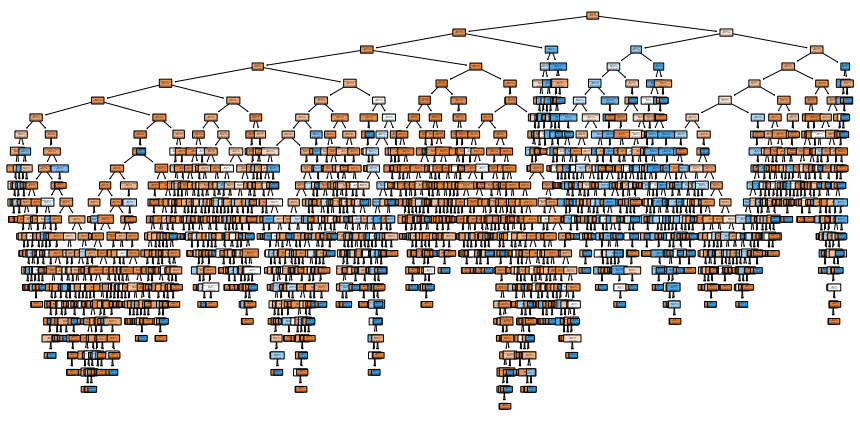

In [229]:
# Import necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix
from sklearn import metrics

# Create a decision tree classifier
model = DecisionTreeClassifier()

# Train the model
model.fit(X_train, y_train)

# Visualise the decision tree
plt.figure(figsize=(15,7.5))
plot_tree(model, filled=True, rounded=True,
          feature_names=churn_feature.columns,
          class_names=['Non-Churner','Churner'])
plt.show()

# Predict the response for the test dataset
y_pred = model.predict(X_test)

**Random Forest - Confusion Matrix**

In [230]:
# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1370,  237],
       [ 187,  206]])

In [231]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

(1370, 237, 187, 206)

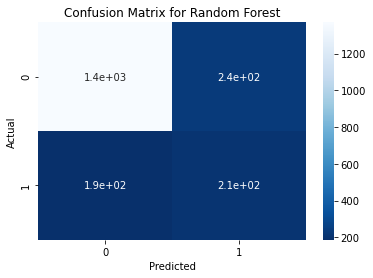

Accuracy: 0.788
Precision: 0.4650112866817156
Recall: 0.5241730279898219
F1 score: 0.49282296650717705


In [232]:
# Visualise the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues_r')
plt.title('Confusion Matrix for Random Forest')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

**(Pre-Tuning) Random Forest - Feature Importance**

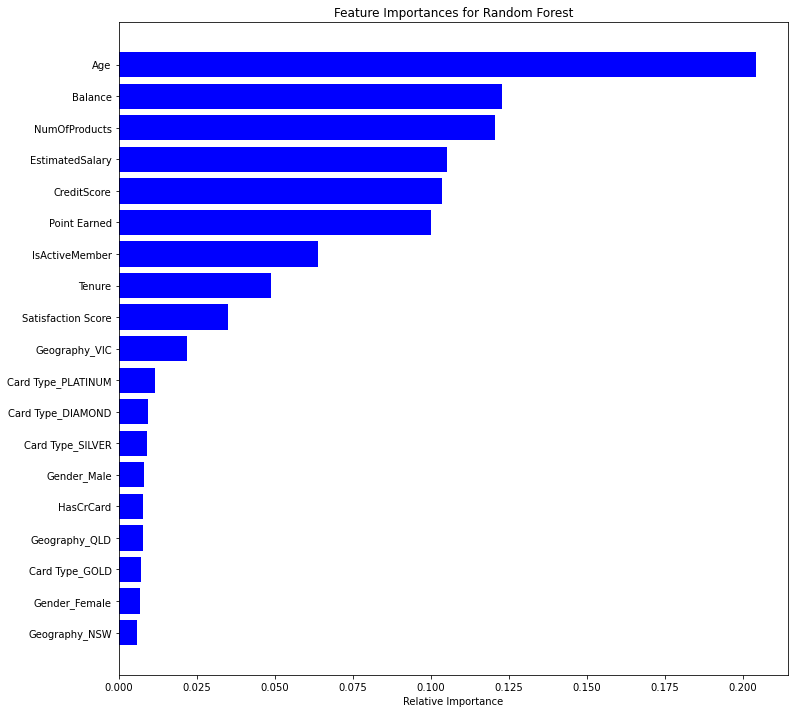

In [233]:
# Display feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances for Random Forest')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [234]:
# get model type
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# get accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_test,y_pred))

# summarize feature importance
for index, variable in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (index, variable))

86.6
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.45      0.57       393

    accuracy                           0.87      2000
   macro avg       0.83      0.71      0.74      2000
weighted avg       0.86      0.87      0.85      2000

Feature: 0, Score: 0.09872
Feature: 1, Score: 0.20948
Feature: 2, Score: 0.06135
Feature: 3, Score: 0.10453
Feature: 4, Score: 0.11968
Feature: 5, Score: 0.01588
Feature: 6, Score: 0.03950
Feature: 7, Score: 0.10094
Feature: 8, Score: 0.04343
Feature: 9, Score: 0.10077
Feature: 10, Score: 0.01026
Feature: 11, Score: 0.00916
Feature: 12, Score: 0.01875
Feature: 13, Score: 0.00915
Feature: 14, Score: 0.00963
Feature: 15, Score: 0.01261
Feature: 16, Score: 0.01162
Feature: 17, Score: 0.01193
Feature: 18, Score: 0.01263


## Decision Tree - Hyperparameter Tuning

**Limiting tree depth**

The first tree is very deep so we try limiting tree depth to 5 and generate a new model. Compare model explainability vs performance loss between the two models. 

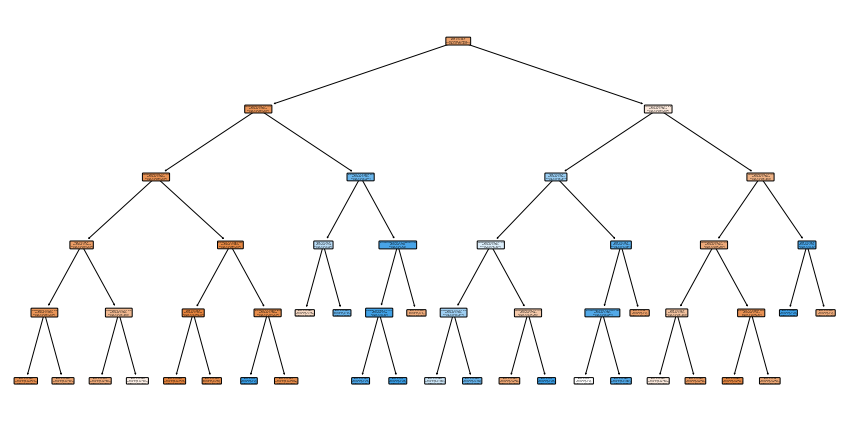

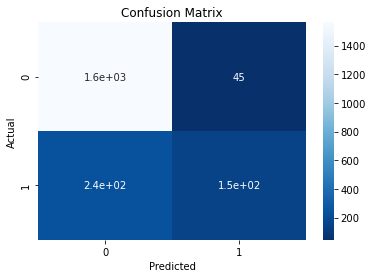

Accuracy: 0.8575
Precision: 0.7727272727272727
Recall: 0.3893129770992366
F1 score: 0.5177664974619289


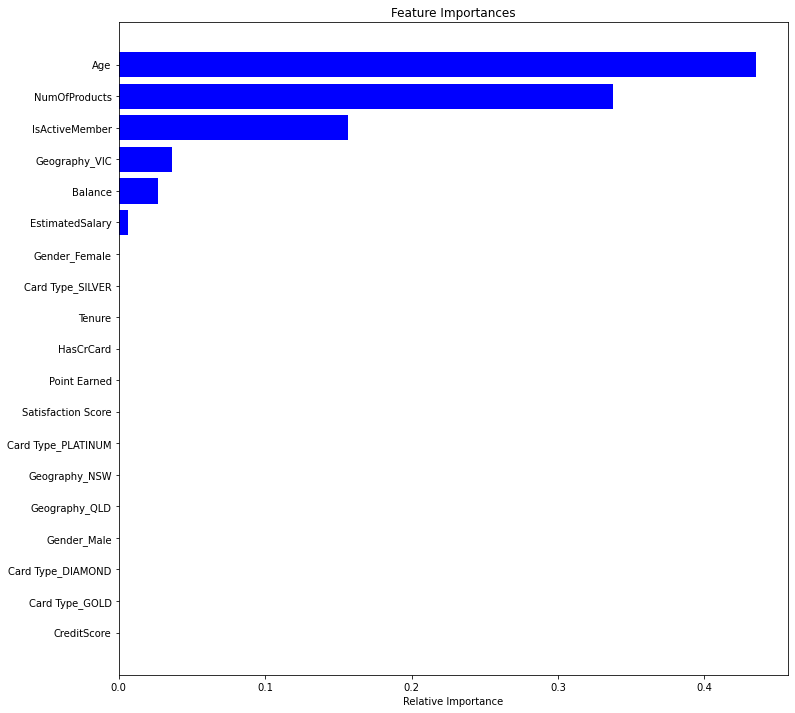

In [236]:
# TODO:Create a decision tree classifier with different hyperparameters
model = DecisionTreeClassifier(max_depth=5, min_samples_split=50)

# TODO:Train the model
model.fit(X_train, y_train)

# TODO:Visualise the decision tree
plt.figure(figsize=(15,7.5))
plot_tree(model, filled=True, rounded=True,
          feature_names=X.columns,
          class_names=['Non-Churner','Churn'])
plt.show()

# TODO:Predict the response for the test dataset
y_pred = model.predict(X_test)

# TODO:Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# TODO:Visualise the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# TODO:Print evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

# TODO:Display feature importance
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**(Post-Tuning) Random Forest - Feature Importance**

In [237]:
# get model type
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# get accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_test,y_pred))

# summarize feature importance
for index, variable in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (index, variable))

86.35000000000001
              precision    recall  f1-score   support

           0       0.88      0.97      0.92      1607
           1       0.77      0.44      0.56       393

    accuracy                           0.86      2000
   macro avg       0.82      0.70      0.74      2000
weighted avg       0.85      0.86      0.85      2000

Feature: 0, Score: 0.10044
Feature: 1, Score: 0.20810
Feature: 2, Score: 0.06276
Feature: 3, Score: 0.10530
Feature: 4, Score: 0.12369
Feature: 5, Score: 0.01598
Feature: 6, Score: 0.03715
Feature: 7, Score: 0.10047
Feature: 8, Score: 0.04176
Feature: 9, Score: 0.09972
Feature: 10, Score: 0.01011
Feature: 11, Score: 0.00836
Feature: 12, Score: 0.01917
Feature: 13, Score: 0.00876
Feature: 14, Score: 0.00918
Feature: 15, Score: 0.01266
Feature: 16, Score: 0.01119
Feature: 17, Score: 0.01219
Feature: 18, Score: 0.01302


In [238]:
y_pred = clf.predict(X_test)
y_pred_probas = clf.predict_proba(X_test)[:, 1]
pred_df = pd.DataFrame({'y_pred': y_pred, 'y_pred_probas': y_pred_probas})
pred_df = pred_df[(pred_df['y_pred_probas']!=1) & (pred_df['y_pred_probas']!=0)]
pred_df.head(25)

,y_pred,y_pred_probas
0,0,0.083916
1,0,0.077670
2,0,0.077670
3,0,0.234973
4,0,0.109462
5,0,0.019477
6,0,0.109462
7,0,0.221569
8,0,0.247525
9,0,0.465753


# Limiting tree depth

The first tree is very deep so we try limiting tree depth to 5 and generate a new model. Compare model explainability vs performance loss between the two models. 

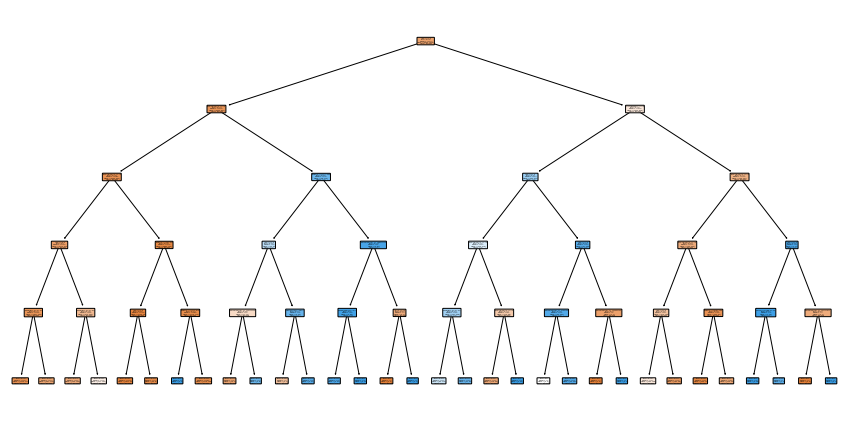

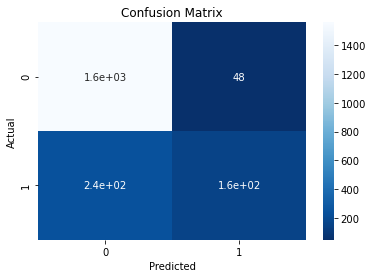

Accuracy: 0.8575
Precision: 0.7647058823529411
Recall: 0.3969465648854962
F1 score: 0.5226130653266331


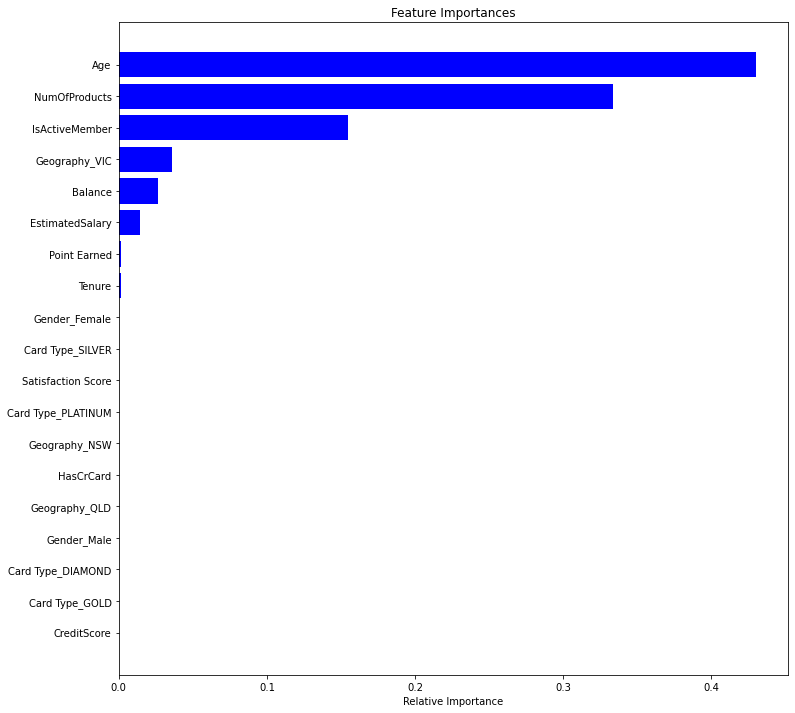

In [83]:
# Create a decision tree classifier with max_depth set to 5
clf = DecisionTreeClassifier(max_depth=5)

# Train the model
clf.fit(X_train, y_train)

# Visualise the decision tree
plt.figure(figsize=(15,7.5))
plot_tree(clf, filled=True, rounded=True,
          feature_names=X.columns,
          class_names=['No Loan','Loan'])
plt.show()

# Predict the response for the test dataset
y_pred = clf.predict(X_test)

# Create a confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualise the confusion matrix
sns.heatmap(cm, annot=True, cmap='Blues_r')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Print evaluation metrics
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Precision:", metrics.precision_score(y_test, y_pred))
print("Recall:", metrics.recall_score(y_test, y_pred))
print("F1 score:", metrics.f1_score(y_test, y_pred))

# Display feature importance
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12,12))
plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

**Example Answer:**

Limiting the maximum depth of a decision tree is a form of regularisation, which is a technique used to prevent overfitting. By setting max_depth to 5, we restrict the tree to only make decisions based on at most five features, thereby simplifying the model. This has several benefits:

1. Preventing Overfitting: A shallower tree is less likely to fit to the noise in the data, leading to better performance on unseen data (i.e., improved generalisation).

2. Improving Interpretability: A shallower tree is easier to visualise and understand. Each decision can be traced through the tree, making it clear why the model made a certain prediction.

3. Reducing Training Time: A shallower tree requires fewer computations to train, which can significantly reduce training time for large datasets. In this case it doesn't matter much.

However, limiting the tree depth also has its trade-offs:

1. Potential Underfitting: If the tree is too shallow, it may not be able to capture important patterns in the data, leading to underfitting. The model might be too simple to accurately model the relationship between the features and the target variable.

2. Loss of Detailed Information: While a less complex model is easier to interpret, it may not capture the detailed information that a deeper tree could. Some nuanced patterns might be missed, which could be crucial in certain applications.

## Random Forest

In [ ]:
# get model type
model = RandomForestClassifier()

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

# get accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_test,y_pred))

# summarize feature importance
for index, variable in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (index, variable))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

In [ ]:
import matplotlib.pyplot as plt
from sklearn import svm, datasets
from sklearn.metrics import ConfusionMatrixDisplay

# add for all models - display the confusion matrix
disp=ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues) # find the .fit() method and replace the variable - in this case 'classifier' (from 3.2.4) with 'model'
print(disp.confusion_matrix)

# improve readibility of the matrix for non-technical business users
disp.ax_.set_title('Confusion Matrix for Random Forest model')
classes = ['Positive', 'Negative']
disp.ax_.set_xticklabels(['Predicted ' + cls for cls in classes])
disp.ax_.set_yticklabels(['True ' + cls for cls in classes])

plt.show()

## Gradient Boosting Machines

* What are GBMs and how do they differ from other machine learning algorithms? 

* How do the hyperparameters (`n_estimators`, `learning_rate`, `max_depth`, `min_samples_split`, and `min_samples_leaf`) affect the model's performance?

In [ ]:
# get model type
model = XGBClassifier()

# fit the model
model.fit(X_train, y_train)

# get importance
importance = model.feature_importances_

#get accuracy
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(accuracy * 100)
print(classification_report(y_test,y_pred))

# summarize feature importance
for index, variable in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (index, variable))

In [ ]:
confusion_matrix(y_test, y_pred)

In [ ]:
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
tn, fp, fn, tp

In [ ]:
# display the confusion matrix
disp=ConfusionMatrixDisplay.from_estimator(model, X_test, y_test, cmap=plt.cm.Blues) # find the .fit() method and replace the variable - in this case 'classifier' (from 3.2.4) with 'model'
print(disp.confusion_matrix)

# improve readibility of the matrix for non-technical business users
disp.ax_.set_title('Confusion Matrix for eXtreme Gradient Boosting (XGB) model')
classes = ['Positive', 'Negative']
disp.ax_.set_xticklabels(['Predicted ' + cls for cls in classes])
disp.ax_.set_yticklabels(['True ' + cls for cls in classes])

plt.show()

## Gradient Boosting Machines - Hyperparameters

## Statistical Measures

In [15]:
df.describe()

,RowNumber,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned
count,10000.00000,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,1.569094e+07,650.528800,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,606.515100
std,2886.89568,7.193619e+04,96.653299,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,225.924839
min,1.00000,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,119.000000
25%,2500.75000,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,410.000000
50%,5000.50000,1.569074e+07,652.000000,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,605.000000
75%,7500.25000,1.575323e+07,718.000000,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,801.000000
max,10000.00000,1.581569e+07,850.000000,92.000000,10.000000,250898.090000,4.000000,1.00000,1.000000,199992.480000,1.000000,1.000000,5.000000,1000.000000


In [17]:
# Assuming df is your DataFrame name
numerical_vars = ['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'EstimatedSalary', 'Satisfaction Score', 'Point Earned'] 
categorical_vars = ['IsActiveMember', 'HasCrCard']

# Calculate mode for numerical variables 
mode_numerical = df[numerical_vars].mode().iloc[0]

# Calculate mode for categorical variables 
mode_categorical = df[categorical_vars].mode().iloc[0]

print("Mode for Numerical Variables:")
print(mode_numerical)
print("\nMode for Categorical Variables:")
print(mode_categorical)


Mode for Numerical Variables:
CreditScore             850.00
Age                      37.00
Tenure                    2.00
Balance                   0.00
NumOfProducts             1.00
EstimatedSalary       24924.92
Satisfaction Score        3.00
Point Earned            408.00
Name: 0, dtype: float64

Mode for Categorical Variables:
IsActiveMember    1
HasCrCard         1
Name: 0, dtype: int64


-----------

## Distirbution Visualisation

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns

In [53]:
# Calculate detailed descriptive statistics for numerical variables
descriptive_stats = df[['CreditScore', 'Age', 'Balance', 'EstimatedSalary']].describe()

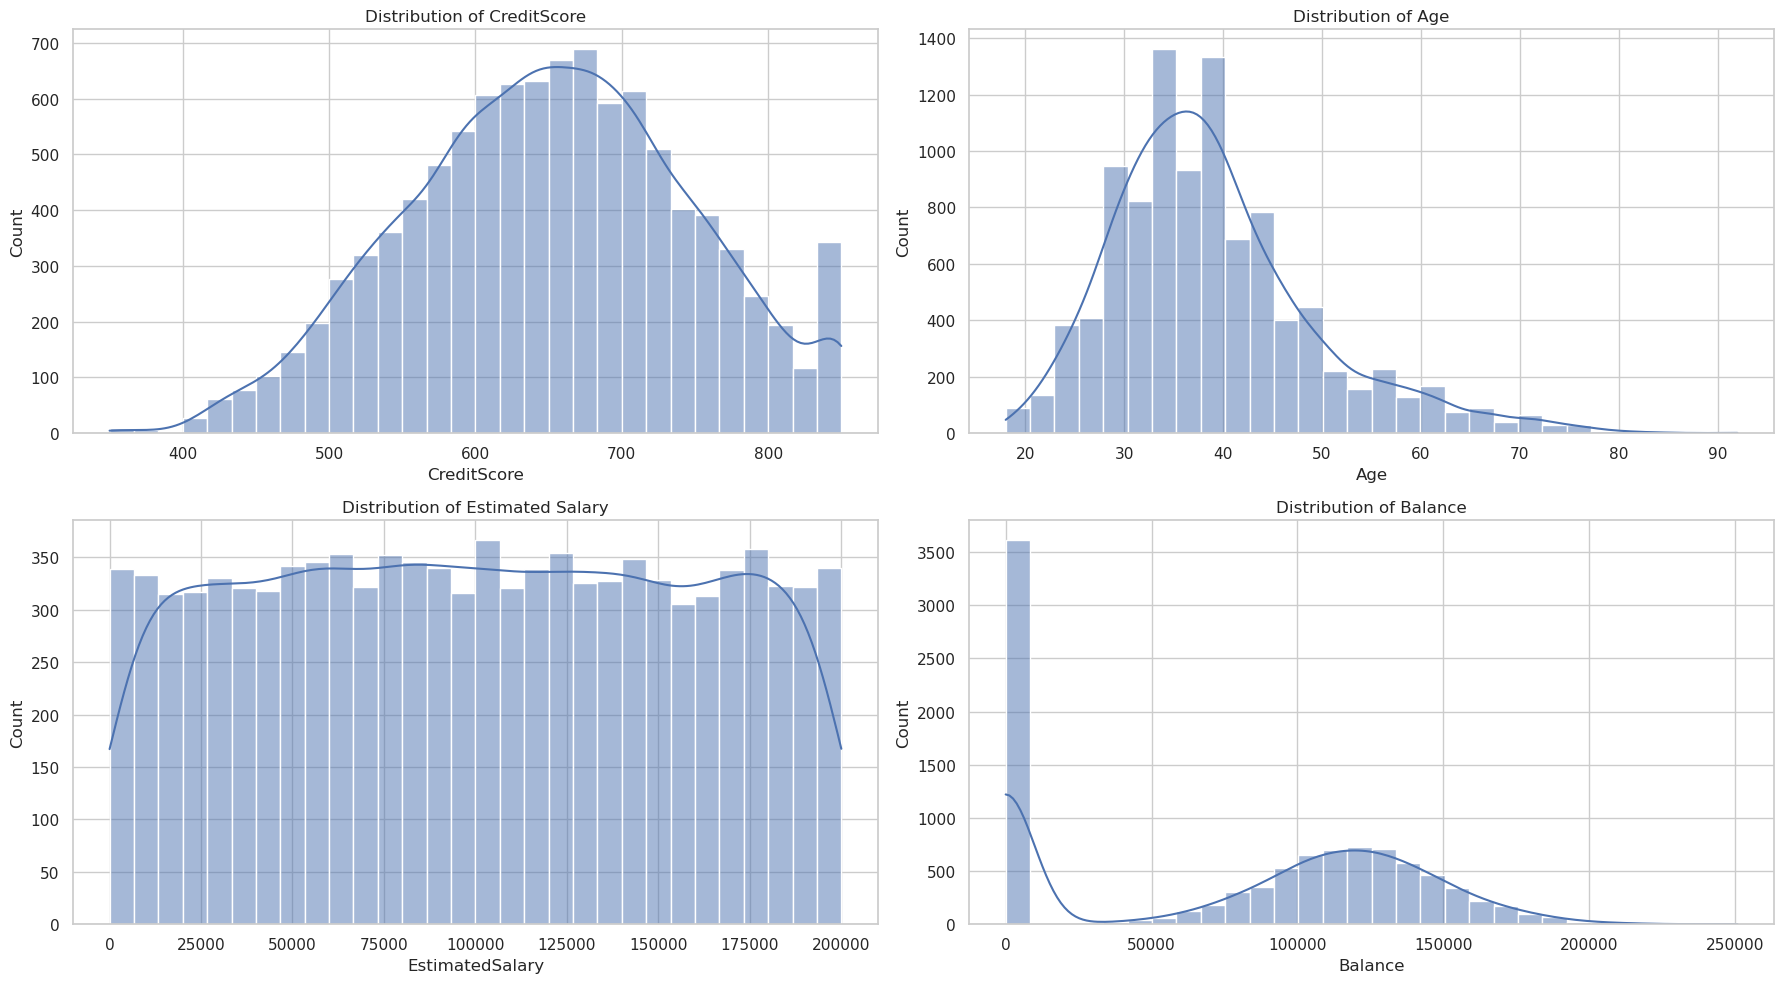

In [61]:
#Now we will see the distribution

# Setting the aesthetic style for the plots
sns.set(style="whitegrid")

# Set the overall figure size to a larger size
plt.figure(figsize=(18, 10))  # Increase the dimensions as needed

#1 subplot: Credit Score distribution
plt.subplot(2, 2, 1)
sns.histplot(df['CreditScore'], bins=30, kde=True)
plt.title('Distribution of CreditScore')

#2 subplot: Age distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Age'], bins=30, kde=True)
plt.title('Distribution of Age')

#3 subplot: Estimated Salary distribution
plt.subplot(2, 2, 3)
sns.histplot(df['EstimatedSalary'], bins=30, kde=True)
plt.title('Distribution of Estimated Salary')

#4 subplot: Balance distribution
plt.subplot(2, 2, 4)
sns.histplot(df['Balance'], bins=30, kde=True)
plt.title('Distribution of Balance')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

/tmp/ipykernel_30/3845726658.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['NumOfProducts'], y=df['Age'], palette='Set3')


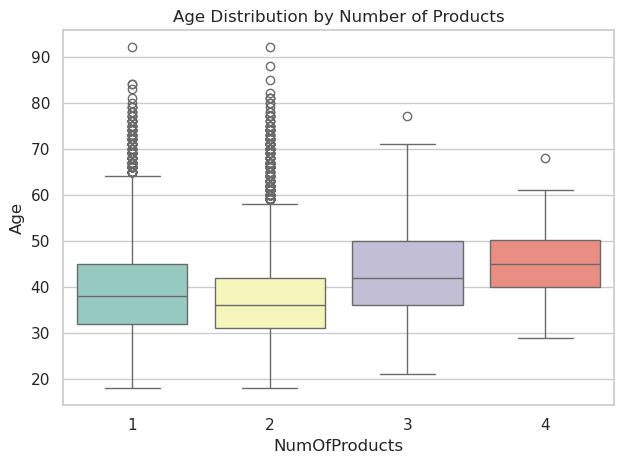

In [78]:
# Boxplots for examining outliers
sns.boxplot(x=df['NumOfProducts'], y=df['Age'], palette='Set3')
plt.title('Age Distribution by Number of Products')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

/tmp/ipykernel_30/1580591721.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=df['IsActiveMember'], y=df['Balance'], palette="Set3")


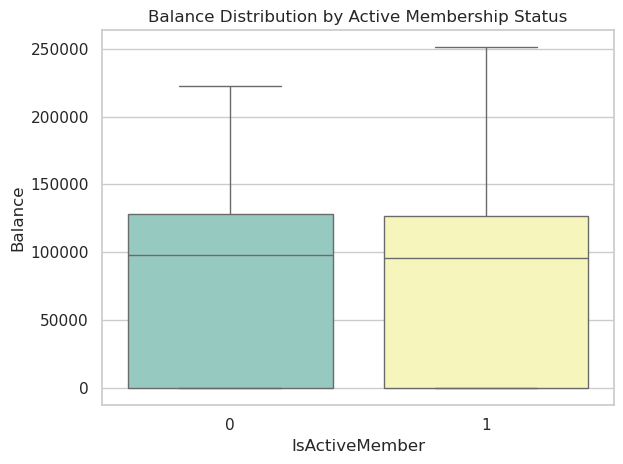

In [79]:
sns.boxplot(x=df['IsActiveMember'], y=df['Balance'], palette="Set3")
plt.title('Balance Distribution by Active Membership Status')

plt.tight_layout()  # Adjust subplots to fit into the figure area
plt.show()

In [66]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited', 'Complain',
       'Satisfaction Score', 'Card Type', 'Point Earned'],
      dtype='object')

<Axes: ylabel='Satisfaction Score'>

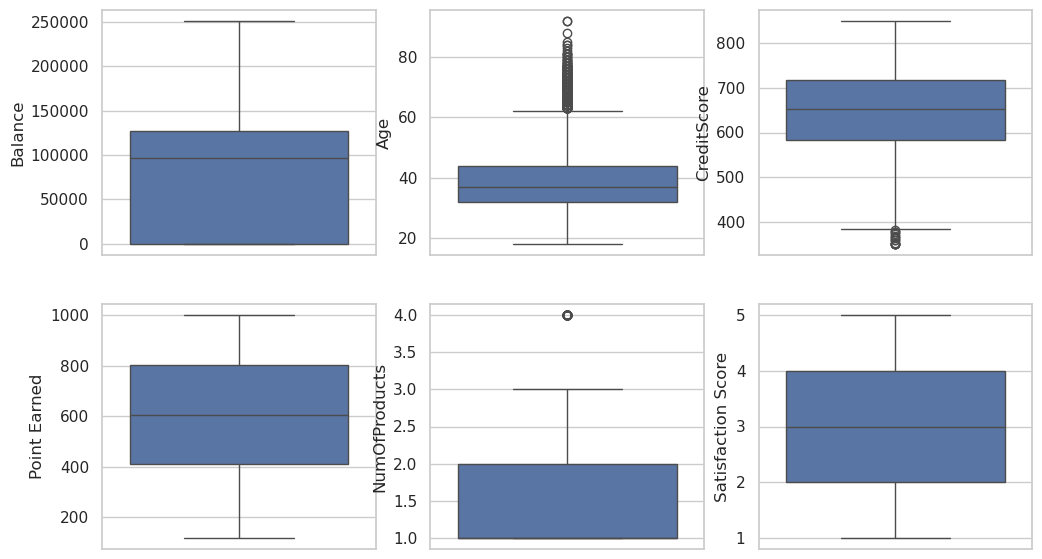

In [83]:
# Plotting the subplots to check the outliers analysis
plt.figure(figsize=(12,7))
plt.subplot(2,3,1)
sns.boxplot(df['Balance'])

plt.subplot(2,3,2)
sns.boxplot(df['Age'])

plt.subplot(2,3,3)
sns.boxplot(df['CreditScore'])

plt.subplot(2,3,4)
sns.boxplot(df['Point Earned'])

plt.subplot(2,3,5)
sns.boxplot(df['NumOfProducts'])

plt.subplot(2,3,6)
sns.boxplot(df['Satisfaction Score'])

/tmp/ipykernel_30/3721615181.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


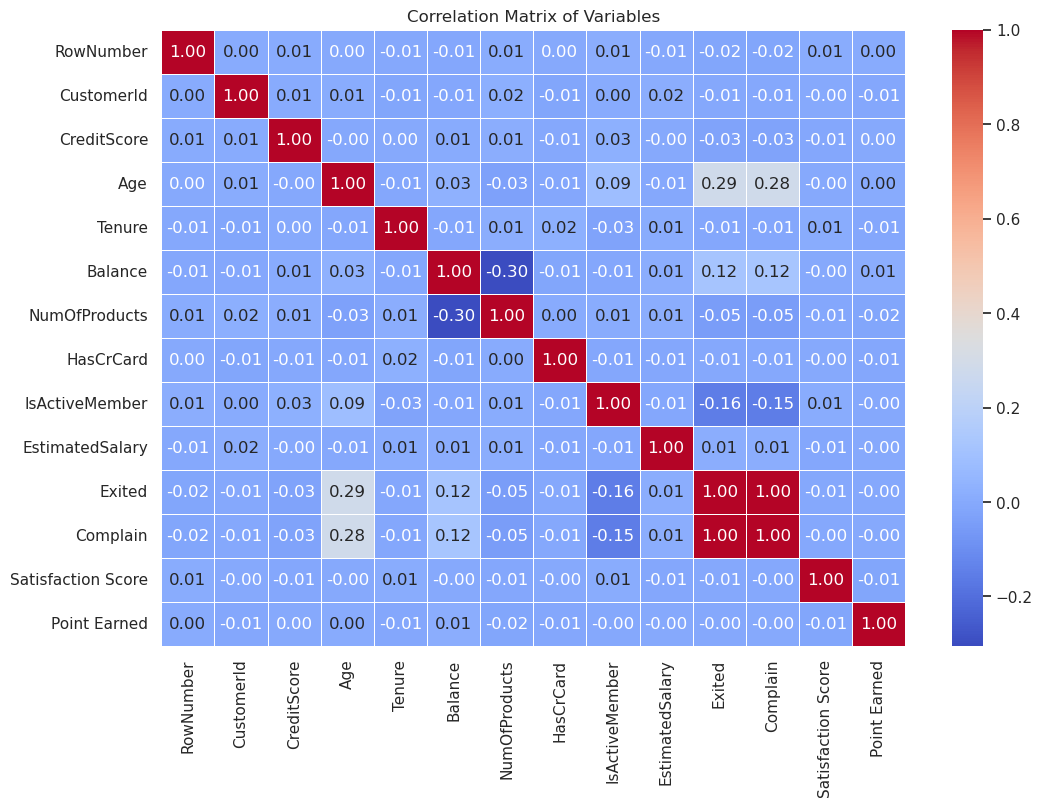

In [84]:
# generating a correlation matrix for the numeric variables and visualizing it with a heatmap
correlation_matrix = df.corr()

# Creating a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of Variables')
plt.show()

   - Present a heatmap of correlations between key variables like Age, Balance, Credit Score, and Churn. 
   - Discuss any significant correlations that could inform your analysis and hypothesis.


In [87]:
from scipy.stats import ttest_ind, chi2_contingency

# Checking for outliers in 'Balance' and 'Age'
balance_outliers = df[df['Balance'] > df['Balance'].quantile(0.99)]
age_outliers = df[df['Age'] > df['Age'].quantile(0.99)]

# Exploring the zero balance issue
zero_balance = df[df['Balance'] == 0]

# Hypothesis 1: Older Customers and Churn
age_churned = df[df['Exited'] == 1]['Age']
age_not_churned = df[df['Exited'] == 0]['Age']
t_stat, p_value_age = ttest_ind(age_churned, age_not_churned)

# Hypothesis 2: Active Membership and Churn
contingency_table = pd.crosstab(df['IsActiveMember'], df['Exited'])
chi2_stat, p_value_active, _, _ = chi2_contingency(contingency_table)

balance_outliers, age_outliers, zero_balance.shape, t_stat, p_value_age, chi2_stat, p_value_active


(      RowNumber  CustomerId    Surname  CreditScore Geography  Gender  Age  \
 138         139    15594408       Chia          584       QLD  Female   48   
 177         178    15790355  Okechukwu          606       VIC    Male   36   
 354         355    15625461       Amos          613       NSW  Female   45   
 520         521    15671256  Macartney          850       NSW  Female   35   
 656         657    15813741  Nnachetam          549       QLD    Male   25   
 ...         ...         ...        ...          ...       ...     ...  ...   
 9860       9861    15716431    Brookes          775       NSW  Female   30   
 9916       9917    15770516  Evdokimov          616       QLD  Female   44   
 9920       9921    15673020      Smith          678       NSW  Female   49   
 9925       9926    15605672       Yuan          694       NSW  Female   38   
 9944       9945    15703923    Cameron          744       VIC    Male   41   
 
       Tenure    Balance  NumOfProducts  HasCrCard

## Hypothesis Testing

In [87]:
from scipy.stats import ttest_ind, chi2_contingency

For the first hypothesis, we'll use a t-test to compare the mean age of churned vs. non-churned customers

In [88]:
# 1. T-test for Age between churned and not churned customers
age_churned = df[df['Exited'] == 1]['Age']
age_not_churned = df[df['Exited'] == 0]['Age']
t_test_age = ttest_ind(age_churned, age_not_churned)

t_test_age

TtestResult(statistic=29.76379695489027, pvalue=1.3467162476197306e-186, df=9998.0)

The small p-value shows a strong relationship (significant) between older customers and churn

This result indicates a statistically significant difference in age between customers who have churned and those who have not. Older customers are more likely to churn.




---



For the second, a chi-squared test will help determine if there's a significant relationship between being an active member and churning.

In [90]:
# 2. Chi-squared test for IsActiveMember
cross_tab = pd.crosstab(df['IsActiveMember'], df['Exited'])
chi2_test = chi2_contingency(cross_tab)

chi2_test

Chi2ContingencyResult(statistic=243.6948024819593, pvalue=6.153167438113408e-55, dof=1, expected_freq=array([[3860.7738,  988.2262],
       [4101.2262, 1049.7738]]))

The result of the chi-squared test suggests a statistically significant association between whether a customer is an active member and their likelihood of churning. Being an active member appears to impact the churn rate.




---



### Bootstrapping

In [91]:
import numpy as np
import pandas as pd

# Function to perform bootstrapping
def bootstrap_mean(df, n_bootstrap):
    bootstrap_means = []
    for _ in range(n_bootstrap):
        sample = np.random.choice(df, size=len(df), replace=True)
        bootstrap_means.append(np.mean(sample))
    return bootstrap_means

# Load the dataset
# data = pd.read_csv('/mnt/data/Customer-Churn-Records.csv')

# Attributes to bootstrap
attributes = ['Balance', 'Age', 'CreditScore']
bootstrap_results = {}

# Number of bootstraps
n_bootstrap = 1000

# Perform bootstrapping for each attribute
for attribute in attributes:
    bootstrapped_means = bootstrap_mean(df[attribute].dropna(), n_bootstrap)
    lower_bound = np.percentile(bootstrapped_means, 2.5)
    upper_bound = np.percentile(bootstrapped_means, 97.5)
    bootstrap_results[attribute] = {
        'Mean': np.mean(bootstrapped_means),
        '95% Confidence Interval': (lower_bound, upper_bound)
    }

# Display the results
for attr, results in bootstrap_results.items():
    print(f"{attr}: Mean = {results['Mean']:.2f}, 95% CI = {results['95% Confidence Interval']}")

Balance: Mean = 76476.88, 95% CI = (75291.02168762499, 77673.44117885)
Age: Mean = 38.92, 95% CI = (38.7180775, 39.116025)
CreditScore: Mean = 650.51, 95% CI = (648.5527, 652.4795875)


### Explanation
- This code calculates the bootstrapped mean and 95% confidence interval for the `Balance`, `Age`, and `Credit Score` attributes.
- It performs 1000 bootstrapping iterations (a common choice for bootstrapping), which should be sufficient to approximate the distribution of the mean.
- The results provide an estimate of the mean and the range within which the true mean is likely to lie with 95% confidence.

This approach can provide deeper insights into the stability of these key metrics across your customer base, which is essential for understanding patterns related to churn.


### When to Use Bootstrapping
1. **Small Sample Sizes:** When the sample size is too small to rely on the Central Limit Theorem for approximating the distribution of a statistic.
2. **Unknown Population Distribution:** When the underlying population distribution is unknown or non-normal, making traditional parametric methods unsuitable or unreliable.
3. **Estimating Confidence Intervals:** When you need to estimate confidence intervals for statistics for which standard formulas might not be applicable or available.
4. **Complex Statistics:** For more complex or custom statistics where theoretical distribution might not be easily derivable.
5. **Comparative Studies:** When comparing statistics across different samples or groups and you need a non-parametric approach.

### Choosing Variables for Bootstrapping
Deciding on which variables to bootstrap involves considering the goal of your analysis and the characteristics of your data:

1. **Key Performance Indicators (KPIs):** Focus on variables that are critical to the business decisions or outcomes being considered. For example, if churn rate is a key metric, you might bootstrap variables directly related to churn, like account balance or service usage, to understand their distributions or to test hypotheses about them.

2. **Variables with Uncertainty:** Variables that show high variability or have outliers are often good candidates because the bootstrap can help understand how these characteristics affect your statistical estimates.

3. **Demographic Variables:** Often, demographic variables (like age or income) are bootstrapped to understand the variability in these factors across different subgroups of a population, especially when planning targeted marketing or service adjustments.

4. **Outcome Variables in Experiments:** In experimental designs, bootstrapping outcome variables can help in assessing the robustness of the experimental results, especially in cases with small treatment and control groups.


## Experiment Design